In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
np.random.seed(42)
tf.random.set_seed(42)


In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
input_img = layers.Input(shape=(28, 28, 1))


In [8]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [9]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [12]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.4070 - val_loss: 0.3060
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3019 - val_loss: 0.3002
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2972 - val_loss: 0.2975
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2945 - val_loss: 0.2953
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2926 - val_loss: 0.2938
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2911 - val_loss: 0.2925
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2898 - val_loss: 0.2916
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2889 - val_loss: 0.2909
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2882 - val_loss: 0.2904
Epoch 10/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2877 - val_loss: 0.2899
Epoch 11/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2872 - val_loss: 0.2894
Epoch 12/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/st

In [13]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


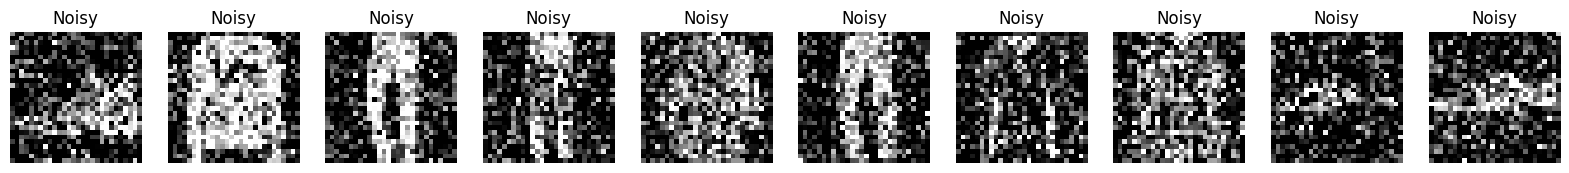

In [14]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

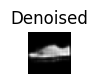

In [16]:
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

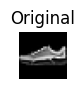

In [18]:
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [19]:
from sklearn.manifold import TSNE

In [21]:
encoder = models.Model(input_img, encoded)
bottleneck_features = encoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [22]:
bottleneck_flat = bottleneck_features.reshape(len(bottleneck_features), -1)

In [23]:
tsne = TSNE(n_components=2, random_state=42)
bottleneck_2d = tsne.fit_transform(bottleneck_flat)


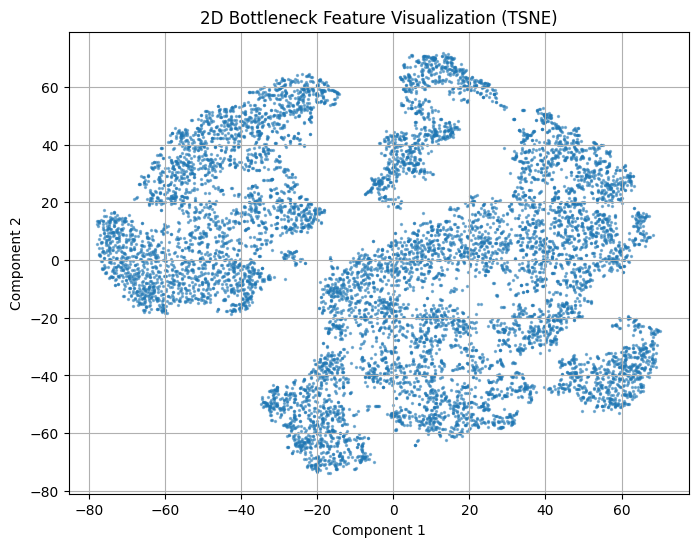

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(bottleneck_2d[:, 0], bottleneck_2d[:, 1], s=2, alpha=0.5)
plt.title("2D Bottleneck Feature Visualization (TSNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


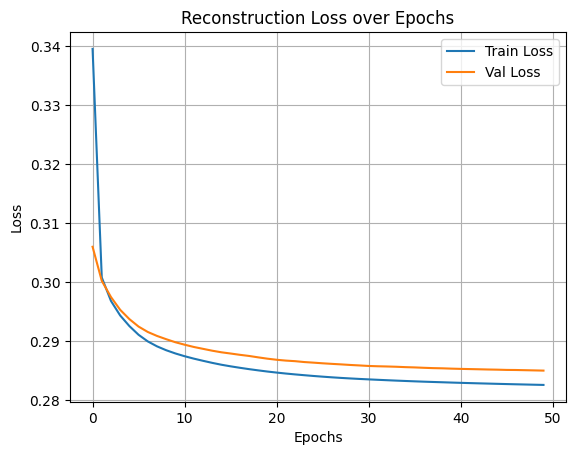

In [25]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Reconstruction Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Dataset: Fashion MNIST, normalized and reshaped.

Noise: Added Gaussian noise to inputs for denoising training.

Model: Convolutional Autoencoder with bottleneck layer (7x7x16) for compression.

Training: Used binary_crossentropy loss, Adam optimizer, and EarlyStopping to prevent overfitting.

Visualizations:

Reconstructed vs. Noisy vs. Original images

Bottleneck features using t-SNE

Loss graph over epochs (Train vs Val)